In [187]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# Load Dataset

Using the ucimlrepo library for getting dataset available in UCI

In [188]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
  
# fetch dataset 
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 

# Combine both variables in a single dataframe to evalute
frames = [X, y]
data = pd.concat(frames, axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Exploration

Check if each columns in the dataset has null values. This also checks the the number of samples and data type for each of the column. 

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [190]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [191]:
X = data.iloc[:, :-1]
X = X.drop(labels=['Sex'], axis=1)
y = data.iloc[:, -1]
column_names = X.columns.values
print(str(column_names))
X.head()

['Length' 'Diameter' 'Height' 'Whole_weight' 'Shucked_weight'
 'Viscera_weight' 'Shell_weight']


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


# Distribution Plot

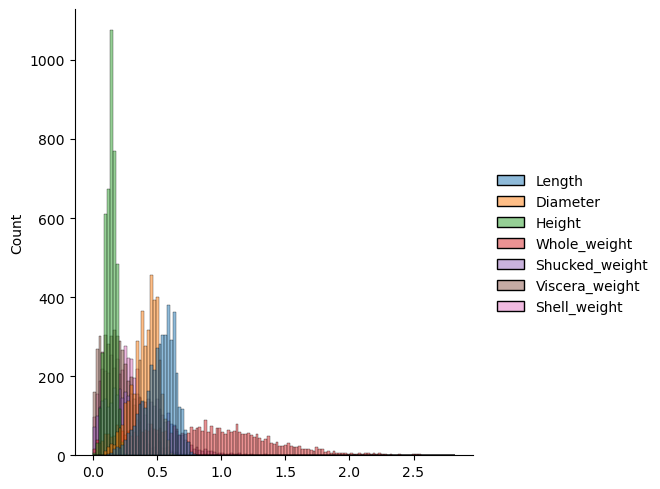

In [192]:
sns.displot(X)

# Preprocessing

In [193]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


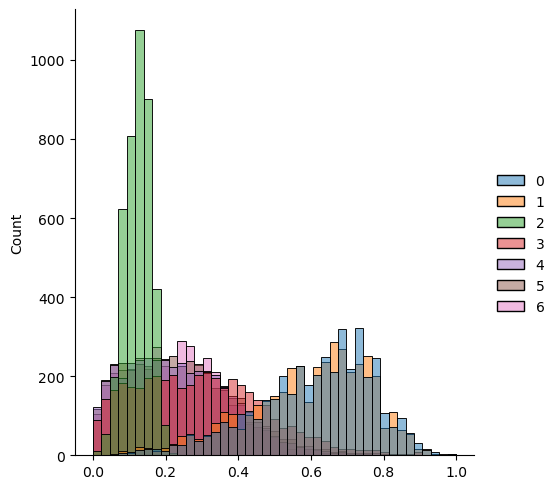

In [194]:
sns.displot(X)

In [195]:
X = pd.DataFrame(X, columns=column_names)
# X = X.drop(labels=['Height'], axis=1)

# Data Exploration 

See the relationship between the target and all the features. 
This is to be able to check if the chosen features can have a linear relationship with the target

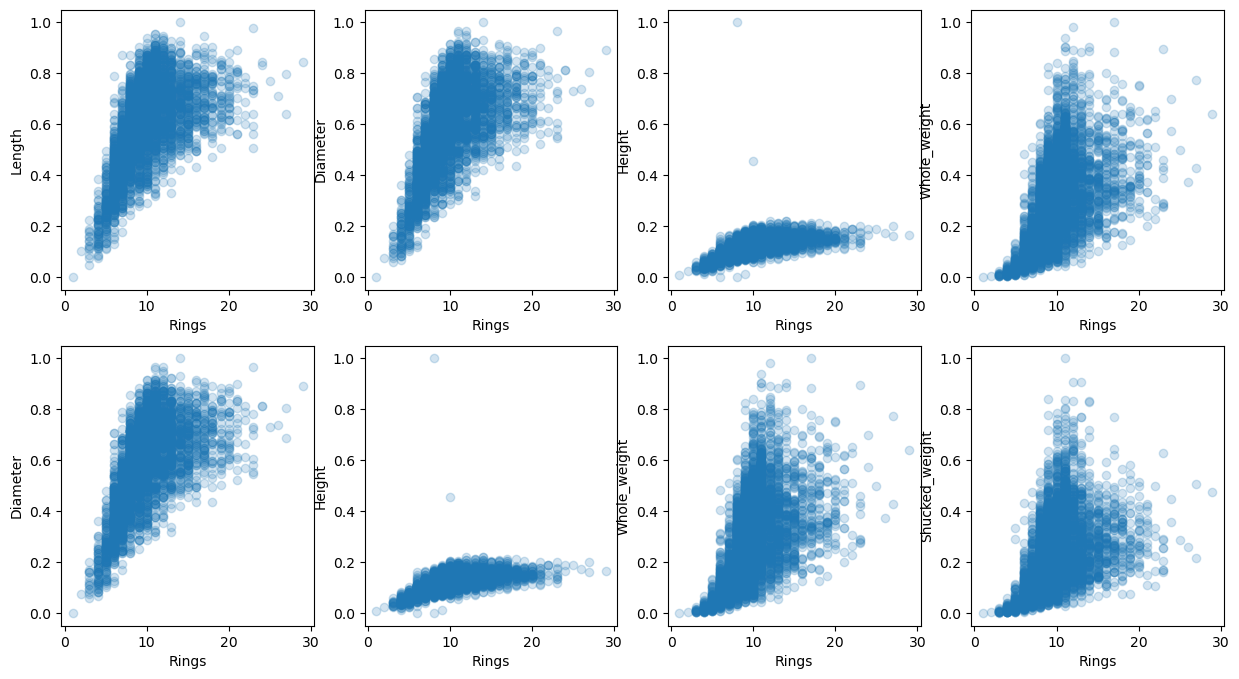

In [196]:
feature_names = X.columns.values

fig, axs = plt.subplots(2,4, figsize=(15,8))
for i in range(2):
    for j in range(4):
        axs[i, j].scatter(y, X.iloc[:, i + j], alpha=0.2)
        axs[i, j].set_xlabel('Rings')
        axs[i, j].set_ylabel(feature_names[i+j])

# Split the dataset 
Using 80% for Train and 20% for Test

In [197]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f'X Train Shape: {x_train.shape} ===== Y Train Count: {len(y_train)}')
print(f'X Test Shape: {x_test.shape} ===== Y Test Count: {len(y_test)}')

X Train Shape: (3341, 7) ===== Y Train Count: 3341
X Test Shape: (836, 7) ===== Y Test Count: 836


# Initialize model

The model would be a Linear Regression model.
Fit the model with the train dataset, both features and targets. From this, the regression line is created for each of the features in respect to the target, aiming to minimize the error between all the data points in respect to the regression line.

In [198]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [199]:
from sklearn.linear_model import ARDRegression

ard_reg = ARDRegression()
ard_reg.fit(x_train, y_train)

ARDRegression()

# Test model

Get prediction output of the model

In [200]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

ard_reg_train_pred = ard_reg.predict(x_train)
ard_reg_test_pred = ard_reg.predict(x_test)

# Model Evaluation

Using the prediction of the model with respect with the input feature and the hard truth labels for the same input feature.
MSE and R2 is used to evaluate the model. 
The evaluation is also done for both Train and Test dataset.

In [201]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression 
lr_train_mse = mean_squared_error(y_train, lr_train_pred) 
lr_train_r2 = r2_score(y_train, lr_train_pred)

lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

# ARD Regression
ard_reg_train_mse = mean_squared_error(y_train, ard_reg_train_pred) 
ard_reg_train_r2 = r2_score(y_train, ard_reg_train_pred)

ard_reg_test_mse = mean_squared_error(y_test, ard_reg_test_pred)
ard_reg_test_r2 = r2_score(y_test, ard_reg_test_pred)

results_dict = {
    "Linear Regression" : [lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2],
    "ARD Regression" : [ard_reg_train_mse, ard_reg_test_mse, ard_reg_train_r2, ard_reg_test_r2]
}

results = pd.DataFrame(results_dict).transpose()
results.columns = ["MSE (Train)", "MSE (Test)", "R2 (Train)", "R2 (Test)"]
results

,MSE (Train),MSE (Test),R2 (Train),R2 (Test)
Linear Regression,4.777124,5.728152,0.539988,0.450265
ARD Regression,4.778997,5.716139,0.539807,0.451418


In [202]:
# Get the coefficients and intercept
coef = lr.coef_
intercept = lr.intercept_

for feature, coef in zip(X.columns, lr.coef_):
    print(f"Coefficient for {feature}: {coef}")
print(f"Intercept: {intercept}")

Coefficient for Length: -1.9860608974026812
Coefficient for Diameter: 7.2782211369955405
Coefficient for Height: 25.355105701280987
Coefficient for Whole_weight: 23.392401654965372
Coefficient for Shucked_weight: -28.9453258687957
Coefficient for Viscera_weight: -6.667943411424343
Coefficient for Shell_weight: 9.113582050749514
Intercept: 3.260562541068066


[]

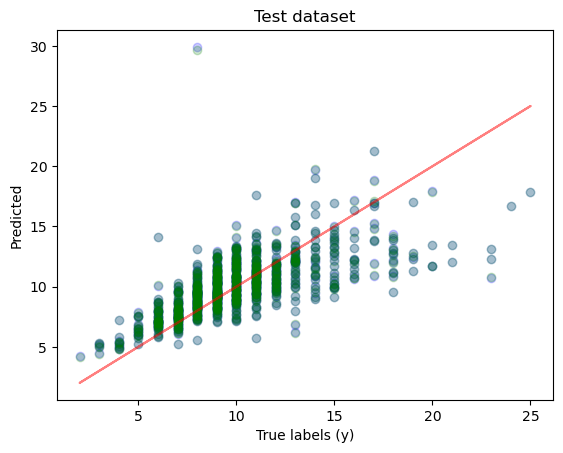

In [203]:
plt.scatter(y_test, lr_test_pred,color='b', alpha=0.2)
plt.scatter(y_test, ard_reg_test_pred, color='green', alpha=0.2)
plt.ylabel("Predicted")
plt.xlabel("True labels (y)")
plt.title("Test dataset")
plt.plot(y_test, y_test, color='red', alpha=0.5)
plt.plot()

[]

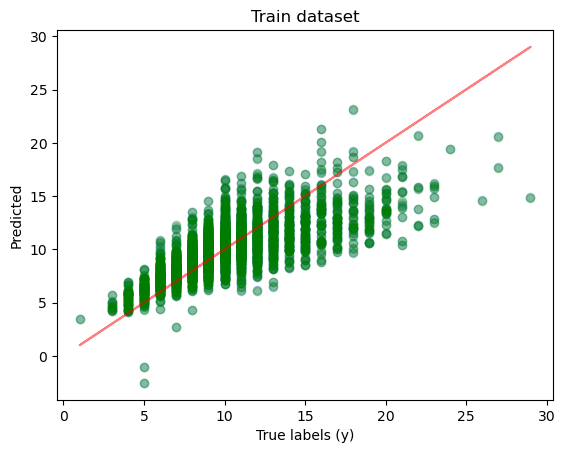

In [204]:
plt.scatter(y_train, lr_train_pred, alpha=0.3)
plt.scatter(y_train, ard_reg_train_pred, color='g', alpha=0.3)
plt.ylabel("Predicted")
plt.xlabel("True labels (y)")
plt.title("Train dataset")
plt.plot(y_train, y_train, color='red', alpha=0.5)
plt.plot()

In [205]:
from joblib import dump

dump(lr,'linear_regression.joblib')
dump(ard_reg, 'ard_regression.joblib')

['ard_regression.joblib']